<a href="https://colab.research.google.com/github/AeroEng16/machine-learning-with-python-logistic-regression-3211129/blob/main/03_computerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tutorial link - https://youtu.be/V_xro1bcAuA
https://learnpytorch.io

**Got to 15:51 in video**

## 0. Computer vision libraries in PyTroch

* `torchvision` consists of datasets, architectures and transformations for computer vision
* `torchvision.datasets` - get datasets and dataloading functions for computer vision
* `torchvision.models` - pre-trained computer vision models
* `torchvision.transforms` functions for manipulating your vision data to be suitable for use with an ML model
* `torch.utils.data.Dataset` - base dataset class for PyTorch
* `torch.utils.data.DataLoader` - creates a Python iterable over a dataset

In [2]:
import torchvision
import torch
from torch import nn
from torchvision import datasets,transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)


2.1.0+cu118
0.16.0+cu118



## 1. Getting a dataset

The dataset if FashionMNIST from torchvision.datasets

In [3]:
#1. Setup training data

train_data = datasets.FashionMNIST(
              root="data",   # Where to download data to
              train=True,    # Do we want the training dataset?
              download=True, # Do we want to download it
              transform = ToTensor(), # How do we want to transform the data
              target_transform = None   # Do we want to transform the label/target?
            )


test_data = datasets.FashionMNIST(
              root="data",   # Where to download data to
              train=False,    # Do we want the training dataset?
              download=True, # Do we want to download it
              transform = ToTensor(), # How do we want to transform the data
              target_transform = None   # Do we want to transform the label/target?
            )

100%|██████████| 26421880/26421880 [00:02<00:00, 9016498.63it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 175867.74it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3256303.35it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 21294158.77it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
len(train_data),len(test_data)

(60000, 10000)

In [5]:
# See the first training example

image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [21]:
class_to_idx = train_data.class_to_idx
class_to_idx

10

In [8]:
# Check the shape



print(f" Image shape: {image.shape} => [color channels, height,width]")

print(f"Image label: {[k for k, v in class_to_idx.items() if v == label][0]}")


 Image shape: torch.Size([1, 28, 28]) => [color channels, height,width]
Image label: Ankle boot


#1.2 Visualise the data

Image shape: torch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

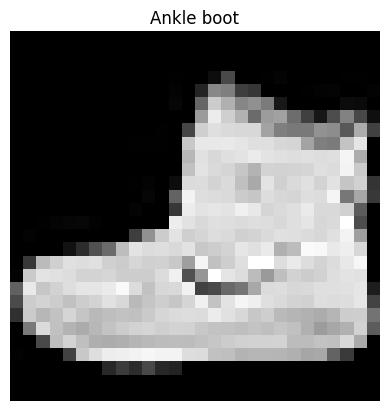

In [9]:
import matplotlib.pyplot as plt
image, label = train_data[0]

print(f"Image shape: {image.shape}")

plt.imshow(image.squeeze(),cmap="gray")
plt.title([k for k, v in class_to_idx.items() if v == label][0])
plt.axis(False)

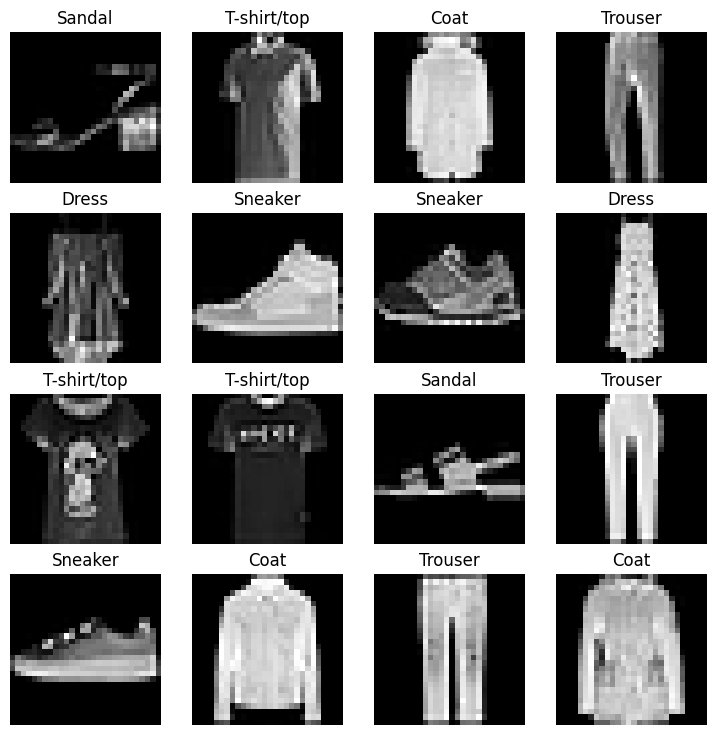

In [10]:
# PLot random images

#torch.manual_seed(42)

fig = plt.figure(figsize=(9,9))

rows,cols = 4,4

for i in range(1,rows*cols+1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  img,label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title([k for k, v in class_to_idx.items() if v == label][0])
  plt.axis(False)

##2. Prepare Dataloader

Dataloader turns our dataset into a python iterable. Specifically, we want to turn out data into batches (or mini-batches).Why?

1. It is more computationally efficient. Computer hardware may struggle to deal with large datasets at the same time. SO we break it down to 32 images at a time (batch size of 32).
2. It gives our neural network more chances to update its gradients per epoch.



In [11]:
from torch.utils.data import DataLoader
# Setup the batch size hyperparameter

BATCH_SIZE = 32

# Turn datasets into iterables (batches)

train_dataloader = DataLoader(
                              dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle=True
                              )

test_dataloader = DataLoader(
                              dataset = test_data,
                              batch_size = BATCH_SIZE,
                              shuffle=False
                              )

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7cb5e0c6d4e0>,
 <torch.utils.data.dataloader.DataLoader at 0x7cb5e0c6eb00>)

In [12]:
# Check properties of dataloaders

print(f"DataLoaders: {train_dataloader,test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")


DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7cb5e0c6d4e0>, <torch.utils.data.dataloader.DataLoader object at 0x7cb5e0c6eb00>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [13]:
# Check what is inside the training dataloader

train_features_batch,train_labels_batch = next(iter(train_dataloader))

train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

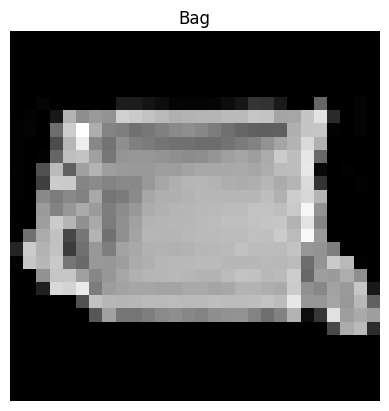

In [14]:
# Show a sample

#torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img,label= train_features_batch[random_idx],train_labels_batch[random_idx]

plt.imshow(img.squeeze(),cmap="gray")
plt.title([k for k, v in class_to_idx.items() if v == label][0])
plt.axis(False)


## 3. Model 0 Build a baseline model

When starting to build a series of machine learning modelling experiments, its best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models.

In other words start simply and complexity when necessary.

In [18]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample

x = train_features_batch[0]
print(f"Shape before flattening :{x.shape} -> [color channels, height, width]")

output = flatten_model(x)

print(f"Shape after flattening: {output.shape} -> [color channels, height*width]")

Shape before flattening :torch.Size([1, 28, 28]) -> [color channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color channels, height*width]


In [28]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features = hidden_units),
        nn.Linear(in_features = hidden_units,
                  out_features = output_shape)
    )
  def forward(self,x):
      return self.layer_stack(x)

In [29]:
torch.manual_seed(42)

#setup Model with input params

model0 = FashionMNISTModelV0(input_shape=784,   #this is 28x28
                             hidden_units=10,
                             output_shape=len(class_to_idx.keys()))

model0.to("cpu")

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [30]:
dummy_X = torch.rand([1,1,28,28])
model0(dummy_X)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### 3.1 Setup loss, optimiser and evaluation metrics

* Loss functions - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimiser - our optimiser will be `torch.optim.SGD()`
* Evaluation metric - since we're working on a classification problem, lets use accuracy as our evaluation metric.

In [31]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  pass
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
      f.write(request.content)

In [32]:
#Import accuracy metrics
from helper_functions import accuracy_fn

In [33]:
#Setup loss function and optimiser
loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(params=model0.parameters(),
                            lr = 0.1,
                            )

### 3.2 Create a function to time our experiments

ML is very experimental. Two of the main things you'll offten want to track are:
1. Your models performance
2. Speed

In [36]:
from timeit import default_timer as timer
def print_train_time(Start:float,
                     end:float,
                     device:torch.device=None):
  """ Print difference between start and end time."""
  total_time = end-Start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [40]:
start_time = timer()
end_time = timer()

print_train_time(Start=start_time,end=end_time,device="cpu")

Train time on cpu: 0.000 seconds


4.132000003664871e-05